In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Prediction child

In [2]:
height = Table.read_table('db/galton.csv').select(1, 2, 7).relabeled(2, 'child')
height

father,mother,child
78.5,67,73.2
78.5,67,69.2
78.5,67,69
78.5,67,69
75.5,66.5,73.5
75.5,66.5,72.5
75.5,66.5,65.5
75.5,66.5,65.5
75,64,71
75,64,68


In [3]:
height = height.with_column(
    'parent average', (height.column('mother') + height.column('father')) / 2
)
height

father,mother,child,parent average
78.5,67,73.2,72.75
78.5,67,69.2,72.75
78.5,67,69,72.75
78.5,67,69,72.75
75.5,66.5,73.5,71
75.5,66.5,72.5,71
75.5,66.5,65.5,71
75.5,66.5,65.5,71
75,64,71,69.5
75,64,68,69.5


In [4]:
def predict_child(pa):
    close_points = height.where('parent average', are.between(pa - 0.5, pa + 0.5))
    return close_points.column('child').mean()

In [5]:
# Apply predict_child to all the midparent heights

prediction = height.with_column(
    'prediction', height.apply(predict_child, 'parent average')
)
prediction

father,mother,child,parent average,prediction
78.5,67,73.2,72.75,70.1
78.5,67,69.2,72.75,70.1
78.5,67,69,72.75,70.1
78.5,67,69,72.75,70.1
75.5,66.5,73.5,71,70.4158
75.5,66.5,72.5,71,70.4158
75.5,66.5,65.5,71,70.4158
75.5,66.5,65.5,71,70.4158
75,64,71,69.5,68.5025
75,64,68,69.5,68.5025


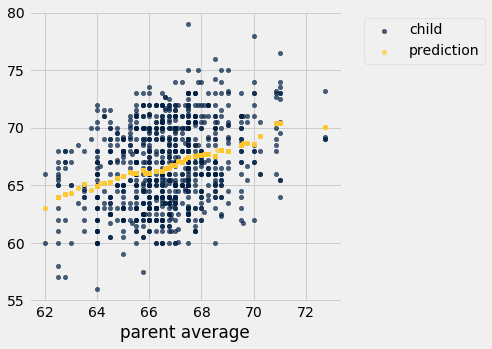

In [6]:
prediction.select(2, 3, 4).scatter('parent average')